<h1> Create commands for batch execution </h1>

In [8]:
import numpy as np
total=50
distances=np.linspace(0,0.75,total)
angles=np.linspace(0,0.75,total)
dist_vec=[]
ang_vec=[]
idx_vec=[]
idx=0


f= open("commands_complete.txt","w")
for dist in distances:
    for ang in angles:
        f.write("""    - name: "nig%.2f_%.2f"
      cmd: "{{ cmd_prefix }} -csf 'lambda name: int(name)<1' -nig %.2f %.2f -ss 1"
      files_to_collect:
        - '{{ dataset_path }}/atom_calibration.json'
        -  '/tmp/optimized.urdf.xacro'\n\n""" % (dist,ang,dist,ang))
        dist_vec.append(dist)
        ang_vec.append(ang)
        idx=idx+1
        idx_vec.append(idx)
        
f.close()

initial_vec=np.column_stack((idx_vec,np.column_stack((dist_vec,ang_vec))))
        

<h1> Create vectors with sensors errors and execution time </h1>

In [9]:
import numpy as np
#initialization
mylines = []
time_vec=[]
e_lidar_vec=[]
e_hand_vec=[]
e_world_vec=[]
i=0

#read file and extract errors and time
with open("outputs/output_075_075_10e_8.txt","rt") as myfile:    
    for myline in myfile:                   
        mylines.append(myline.rstrip('\n'))
                
for line in mylines:
    idx=line.find("Command executed in ")
    if idx != -1:
        i_final=line.find(" secs.")
        i=idx+len("Command executed in ")
        time=float(line[i:i_final])
        time_vec.append(time)

    idx_lidar=line.find("Sensor 3dlidar ")
    if idx_lidar != -1:
        i=idx_lidar+len("Sensor 3dlidar ")
        i_final=len(line)
        e_lidar=float(line[i:i_final])
        e_lidar_vec.append(e_lidar)
        
    idx_hand=line.find("Sensor hand_camera ")
    if idx_hand != -1:
        i=idx_hand+len("Sensor hand_camera ")
        i_final=len(line)
        e_hand=float(line[i:i_final])
        e_hand_vec.append(e_hand)
        
    idx_world=line.find("Sensor world_camera ")
    if idx_world != -1:
        i=idx_world+len("Sensor world_camera ")
        i_final=len(line)
        e_world=float(line[i:i_final])
        e_world_vec.append(e_world)

#create array
e_lidar_vec = np.delete(e_lidar_vec, 1297, 0)

e_hand_vec = np.delete(e_hand_vec, 1297, 0)

e_world_vec = np.delete(e_world_vec, 1297, 0)

vec_total=np.column_stack((np.column_stack((np.column_stack((time_vec,e_lidar_vec)),e_hand_vec)),e_world_vec))
results=np.column_stack((initial_vec,vec_total))

In [10]:
len(e_world_vec)

2500

<h1> Save results in CSV file </h1>

In [11]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
np.around(results,4)

np.savetxt("results.csv", results, delimiter=",")

<h1>SURFACE - LIDAR ERROR</h1>

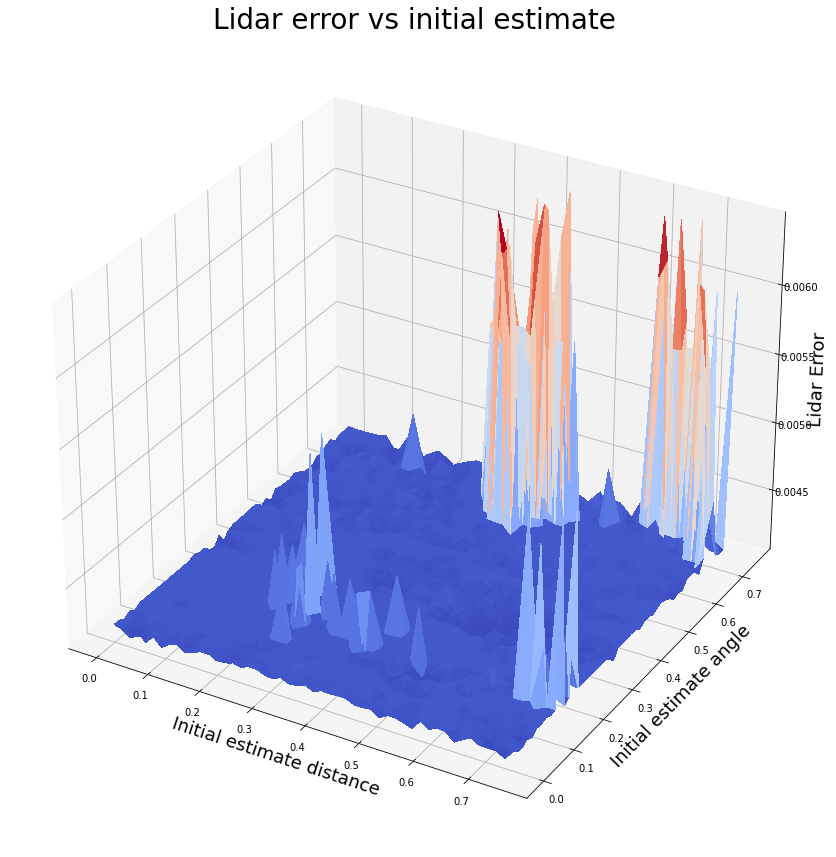

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

font1 = {'color':'black','size':28}
font2 = {'color':'black','size':18}

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

plt.title("Lidar error vs initial estimate", fontdict=font1)
ax.set_xlabel('Initial estimate distance',fontdict=font2)
ax.set_ylabel('Initial estimate angle',fontdict=font2)
ax.set_zlabel('Lidar Error',fontdict=font2)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_lidar_vec),cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<h1> SURFACE - HAND CAMERA ERROR </h1>

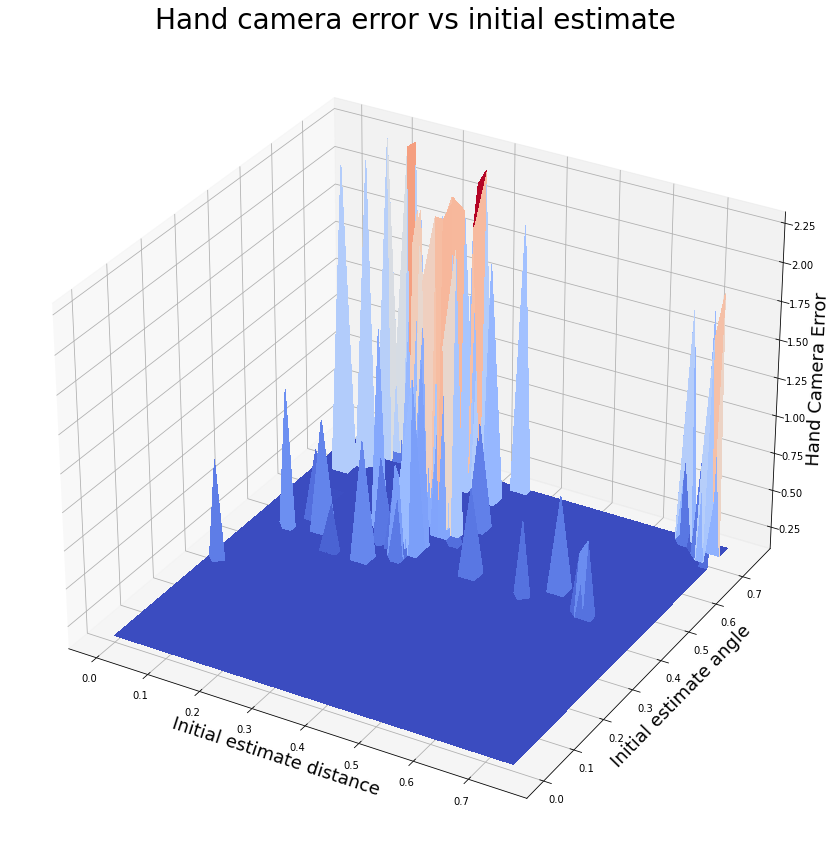

In [13]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

plt.title("Hand camera error vs initial estimate", fontdict=font1)
ax.set_xlabel('Initial estimate distance', fontdict=font2)
ax.set_ylabel('Initial estimate angle', fontdict=font2)
ax.set_zlabel('Hand Camera Error', fontdict=font2)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_hand_vec),cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<h1> SUFACE - WORLD CAMERA ERROR </h1>

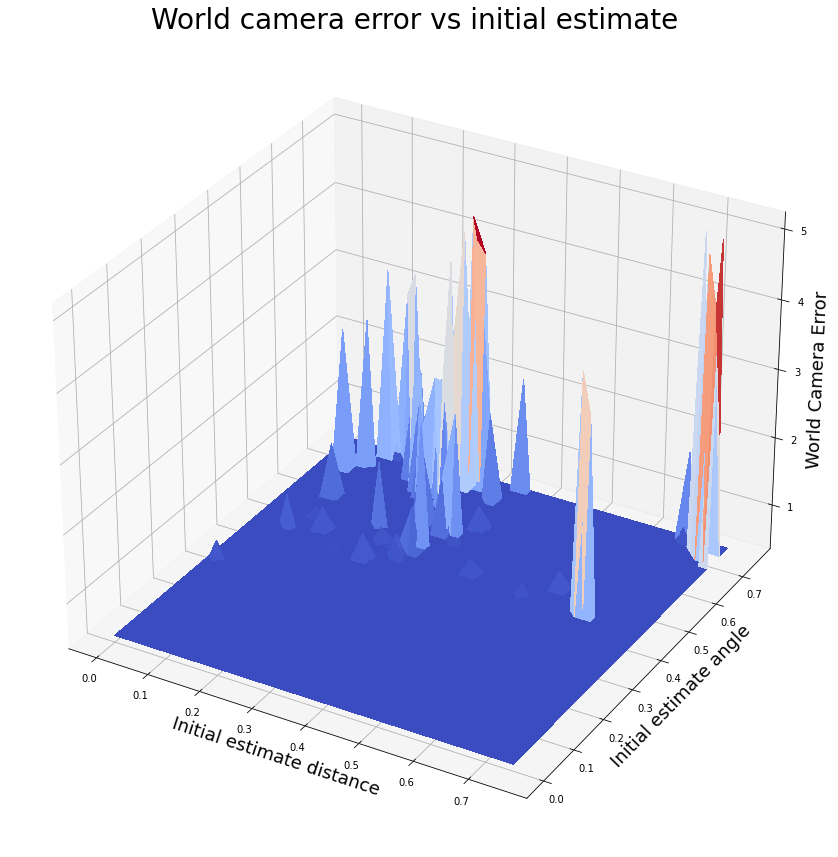

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

plt.title("World camera error vs initial estimate", fontdict=font1)
ax.set_xlabel('Initial estimate distance', fontdict=font2)
ax.set_ylabel('Initial estimate angle', fontdict=font2)
ax.set_zlabel('World Camera Error', fontdict=font2)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(e_world_vec),cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<h1>SURFACE - TIME VS INITIAL ESTIMATE</h1>

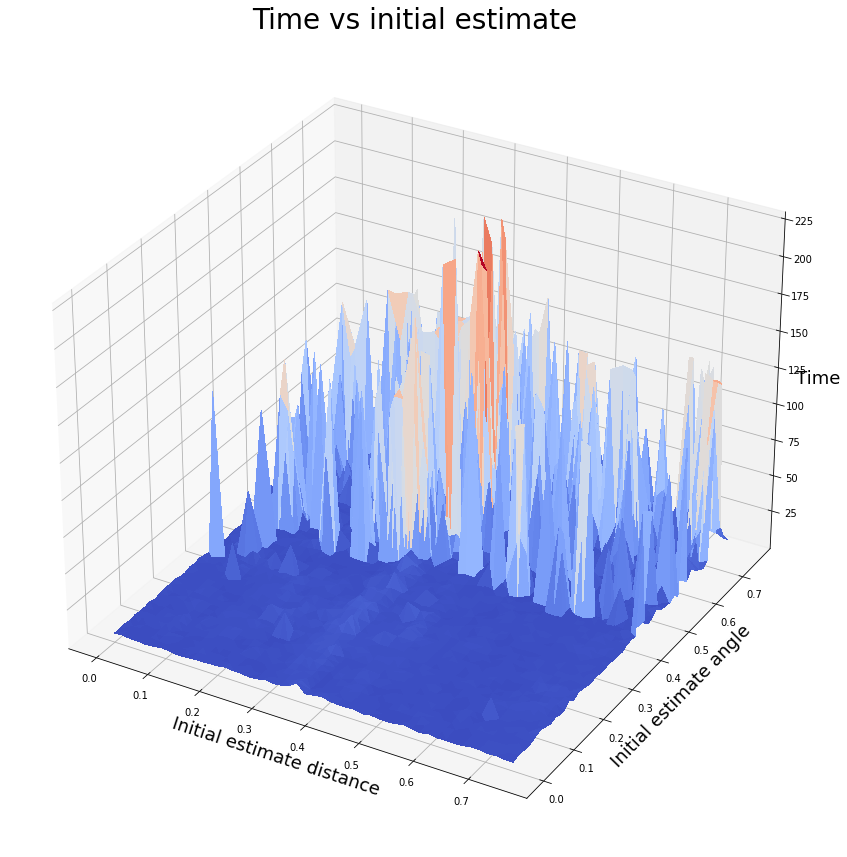

In [15]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

plt.title("Time vs initial estimate", fontdict=font1)
ax.set_xlabel('Initial estimate distance', fontdict=font2)
ax.set_ylabel('Initial estimate angle', fontdict=font2)
ax.set_zlabel('Time', fontdict=font2)

surf = ax.plot_trisurf(np.array(dist_vec), np.array(ang_vec), np.array(time_vec),cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)